1. Work for predicting faulty device using Crisp DM model (Supervised classification techniques)

In [37]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ["Normal", "Faulty"]

In [20]:
data_df = pd.read_csv('C:/Users/Dipendra Singh/Desktop/DataSet_CRISP_DM/secom_mod.txt')


In [21]:
data_df

,Unnamed: 0,ID,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,1,1,0,19/07/2008 11:55:00 ...,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2,2,0,19/07/2008 12:32:00 ...,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3,3,1,19/07/2008 13:17:00 ...,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4,4,0,19/07/2008 14:43:00 ...,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5,5,0,19/07/2008 15:22:00 ...,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1563,1563,0,16/10/2008 15:13:00 ...,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,1564,1564,0,16/10/2008 20:49:00 ...,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,1565,1565,0,17/10/2008 05:26:00 ...,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,1566,1566,0,17/10/2008 06:01:00 ...,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [22]:
data_df.head()

,Unnamed: 0,ID,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,1,1,0,19/07/2008 11:55:00 ...,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2,2,0,19/07/2008 12:32:00 ...,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3,3,1,19/07/2008 13:17:00 ...,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4,4,0,19/07/2008 14:43:00 ...,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5,5,0,19/07/2008 15:22:00 ...,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [39]:
data_df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,1567.0,784.000000,452.498250,1.0000,392.500000,784.00000,1175.500000,1567.0000
class,1567.0,0.060625,0.238718,0.0000,0.000000,0.00000,0.000000,1.0000
feature001,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
feature002,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
feature003,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
...,...,...,...,...,...,...,...,...
feature586,1566.0,3.067826,3.578033,1.1975,2.306500,2.75765,3.295175,99.3032
feature587,1566.0,0.021458,0.012358,-0.0169,0.013425,0.02050,0.027600,0.1028
feature588,1566.0,0.016475,0.008808,0.0032,0.010600,0.01480,0.020300,0.0799
feature589,1566.0,0.005283,0.002867,0.0010,0.003300,0.00460,0.006400,0.0286


In [24]:
data_df.dtypes

Unnamed: 0      int64
ID              int64
class           int64
timestamp      object
feature001    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 594, dtype: object

In [25]:
data_df = data_df.drop(columns="Unnamed: 0")

In [26]:
data_df.describe()

,ID,class,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1567.00000,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,784.00000,0.060625,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,452.49825,0.238718,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,1.00000,0.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,392.50000,0.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,784.00000,0.000000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,1175.50000,0.000000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,1567.00000,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [27]:
data_df.isnull().any()

ID            False
class         False
timestamp     False
feature001     True
feature002     True
              ...  
feature586     True
feature587     True
feature588     True
feature589     True
feature590     True
Length: 593, dtype: bool

Text(0, 0.5, 'Frequency')

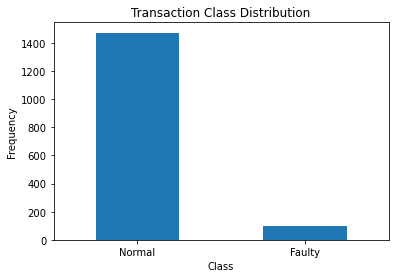

In [38]:
count_classes = pd.value_counts(data_df['class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [35]:

## Get the Fraud and the normal dataset 

faulty = data_df[data_df['class']==1]

normal = data_df[data_df['class']==0]

In [36]:
print(faulty.shape,normal.shape)

(95, 593) (1472, 593)
